In [1]:
import numpy as np
noise = np.random.randn(100, 1)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4+noise

In [2]:
import matplotlib.pyplot as plt

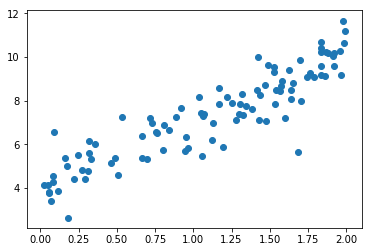

In [3]:
plt.scatter(X,y)
plt.show()

# Normal equation
Screen Shot 2017-11-12 at 10.58.26 AM.png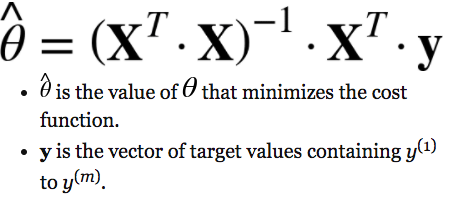

In [4]:
X_b = np.c_[np.ones((100, 1)), X] 

In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
def normal_eqt():
    X_b = np.c_[np.ones((100, 1)), X] #add one for the bias
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

In [7]:
theta_best

array([[ 4.04173694],
       [ 2.97467283]])

In [8]:
#Prediction
P_ = np.array([[4],[3],[9]])
P = np.c_[np.ones((3,1)),P_]


In [9]:
np.shape(P)

(3, 2)

In [10]:
np.shape(theta_best)

(2, 1)

In [11]:
pred_y = theta_best.T.dot(P.T)
true_y = 3 * P_ + 4

In [12]:
pred_y

array([[ 15.94042824,  12.96575541,  30.81379237]])

In [13]:
true_y

array([[16],
       [13],
       [31]])

# Gradient Decent

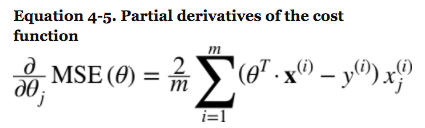

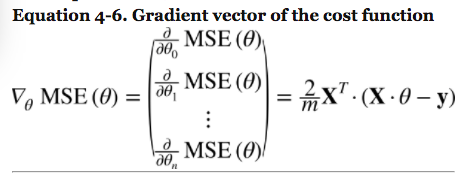

Screen Shot 2017-11-12 at 11.00.51 AM.png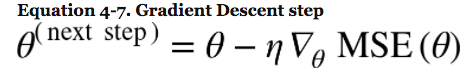

In [14]:
#learning rate
def gradientdecent():
    eta=0.1
    n_iterations = 1000
    m = 100

    theta = np.random.randn(2,1)  # random initialization

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

In [15]:
gradientdecent()

# Stochastic Gradient Decent (SGD)

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
m = len(X_b)
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [17]:
theta

array([[ 4.0630635 ],
       [ 2.97591379]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.reshape(-1))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [19]:
print("{0},{1}".format(sgd_reg.coef_[0],sgd_reg.intercept_[0]))

2.93660272608754,4.005247351054272


# MiniBatch Gradient Decent (SGD)

In [20]:
n_epochs = 1000
t0, t1 = 10, 1000  # learning schedule hyperparameters
miniBatchSize=20
m = len(X_b)
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    shuffledIndices=np.random.permutation(m)
    for i in range(0,m,miniBatchSize):
        random_index = np.random.randint(m)
        xi = X_b[shuffledIndices[i*miniBatchSize:i*miniBatchSize+miniBatchSize]]
        yi = y[shuffledIndices[i*miniBatchSize:i*miniBatchSize+miniBatchSize]]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [21]:
theta

array([[ 3.99512966],
       [ 2.98900799]])

# Polynomial regression

In [22]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [25]:
X_poly = poly_features.fit_transform(X)

In [26]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=100, penalty=None, eta0=0.1)
sgd_reg.fit(X_poly, y.reshape(-1))

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=100, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [27]:
sgd_reg.coef_

array([ 0.95118195,  0.47429638])

In [28]:
sgd_reg.intercept_

array([ 1.81588526])

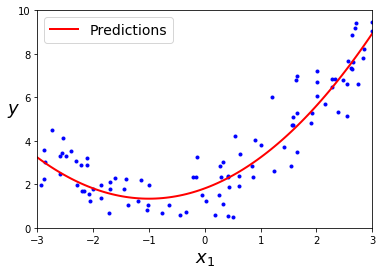

In [29]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = sgd_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

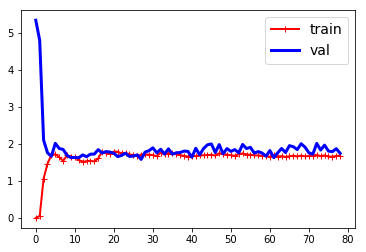

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.show()
sgd_model = SGDRegressor(n_iter=100, penalty=None, eta0=0.1)
#sgd_reg.fit(X_poly, y.reshape(-1))
plot_learning_curves(sgd_model, X, y.reshape(-1))

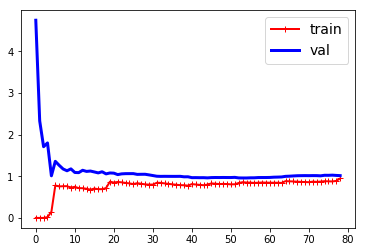

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y.reshape(-1))

# Regularized Linear Model - Ridge
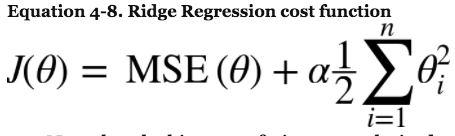

Added a new term to mininize change of model parameters which is control by hyperparamter alpha
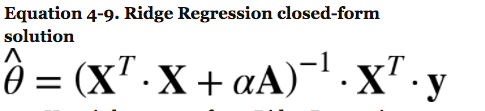
where A is Identity matrix

In [32]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
#use Cholesky to decompose inverse calculation
#ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg = Ridge(alpha=1, solver="sag", random_state=40)
ridge_reg.fit(X,y)
y_new = ridge_reg.predict(X)
print("Ridge: {0}".format(mean_squared_error(y_new, y)))
#sgd_reg = SGDRegressor(penalty="l2")
sgd_reg = SGDRegressor()
sgd_reg.fit(X, y.reshape(-1))
y_new = sgd_reg.predict(X)
print("SGD: {0}".format(mean_squared_error(y_new, y)))

ridge_reg = Ridge(alpha=1,solver="sag", random_state=41)
model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", ridge_reg),
                ])
model.fit(X,y)
y_new = model.predict(X)

print("Ridge + std_scaler: {0}".format(mean_squared_error(y_new, y)))

Ridge: 2.8402845020044016
SGD: 3.5698160528547582
Ridge + std_scaler: 2.8405774081474204


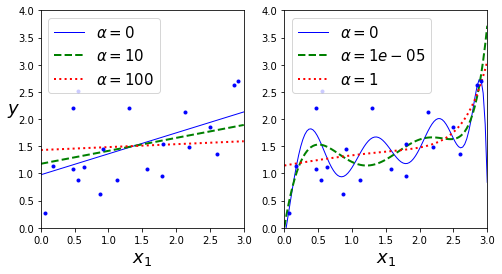

In [33]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

# Logistic regression

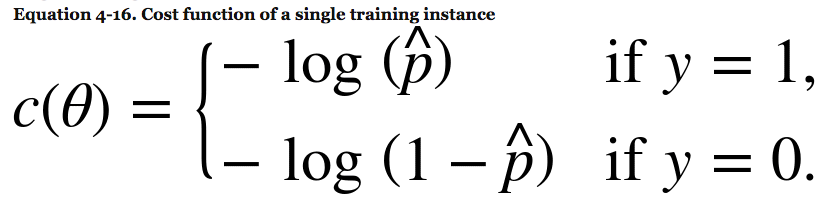
p is the probability given by the model parameters.
The above equation is from theory of information entropy
We want to reduce the entropy such that the model probaility is closed to the events

From l'hospital rule, 

where 
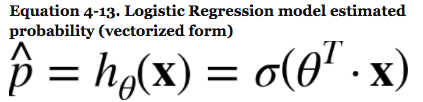

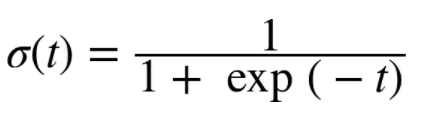

Cost function derived as:
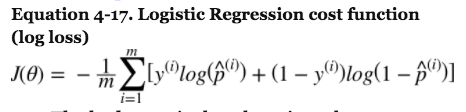

Cost function derivative:
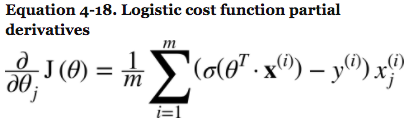
Proof:
https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression

In [34]:
#loading default iris data set
from sklearn import datasets
iris = datasets.load_iris()

In [35]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [36]:
#check if it is Virginica
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
#Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm (Figure 4-23):
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# + more Matplotlib code to make the image look pretty

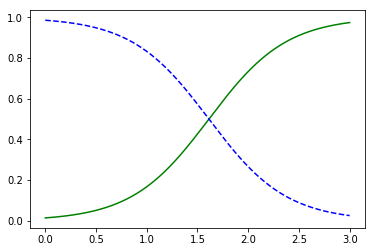

In [39]:
plt.show()

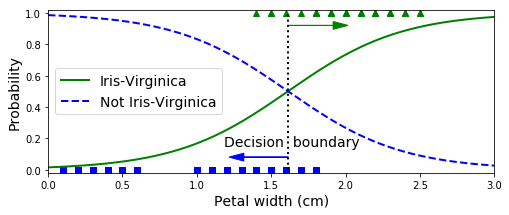

In [40]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
#plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot([decision_boundary, decision_boundary],[0 ,1], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [41]:
decision_boundary

array([ 1.61561562])

In [42]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = np.int32((iris["target"] == 2))

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

In [43]:
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

<a list of 6 text.Text objects>

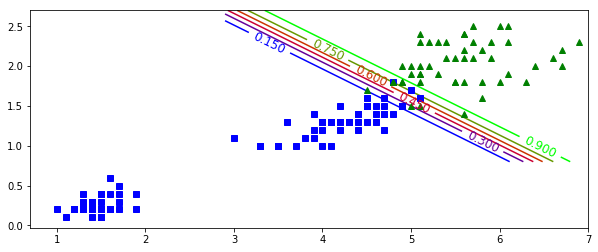

In [44]:
plt.show()

# Softmax 

For each class k
calculate a softmax score
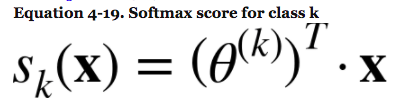

𝜃(k) is the model of each class.... It is stored in matrix 𝚹

compute the score of each class, normalize them by sum of all exponential score of each class
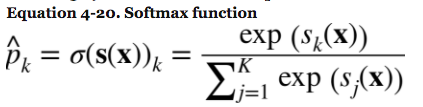

which can be simplified as
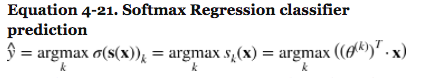
The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.

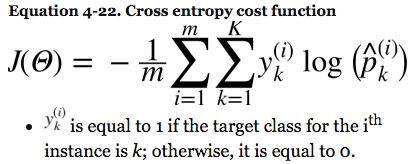

Cross entropy between two distribution

also known as
KL divergence

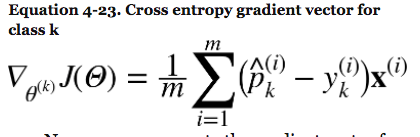

In [45]:
#Take iris data to illustrate Softmax
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)
#C is a regularization parameter
#It is a inverse parameter
#large value of C less regularization

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
softmax_reg.predict([[5, 2]])


array([2])

In [47]:
softmax_reg.predict_proba([[5,2]])

array([[  6.33134077e-07,   5.75276067e-02,   9.42471760e-01]])

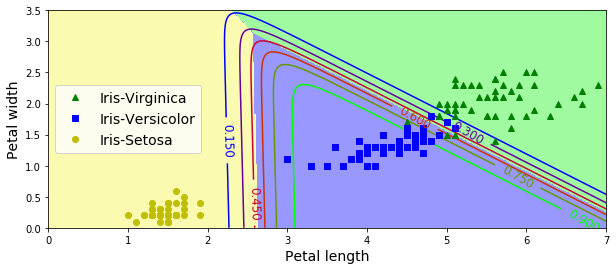

In [52]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])


plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

In [49]:
y_proba [0]

array([  9.99996264e-01,   3.73583605e-06,   6.75998801e-20])

In [53]:
zz

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ..., 
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])